# 分散安定化変換 

**分散安定化変換（variance-stabilizing transformation）** は確率変数の分散を制御して分析しやすくする手法

## 比率のアークサイン変換

標本比率 $\hat{p}$ の分散（標準誤差）は

$$
\operatorname{Var}(\hat{p}) = \frac{p (1 - p)}{n}
$$

であり、$p=0.5$で最大になり、$p$が0や1に近い両端の部分では分散が小さくなる → **比率$p$の値に応じて分散が異なり、扱いにくい**

そこで分散を安定化（variance-stabilizing）したい。

このようなときは$\sin$の逆関数である$\arcsin$関数によって標本比率の平方根を変換する方法がある

:::{card} アークサイン変換

$$
\arcsin( \sqrt{ \hat{p} })
$$

:::


関数の微分で分散を近似する手法である **デルタ法（Delta method）**

$$
\operatorname{Var}(f(\hat{p})) \approx\left(f^{\prime}(p)\right)^2 \cdot \operatorname{Var}\left(\hat{p}\right)
$$

でアークサイン変換後の分散を近似すると

$$
\begin{aligned}
f(p) &=\arcsin (\sqrt{p})\\
f^{\prime}(p) &=\frac{1}{2 \sqrt{p} \sqrt{1-p}}\\
\end{aligned}
$$

なので

$$
\begin{aligned}
\operatorname{Var}(f(\hat{p}))
& \approx \left(\frac{1}{2 \sqrt{p(1-p)}}\right)^2 \cdot \frac{p(1-p)}{n}\\
&= \frac{1}{4 p(1-p)} \cdot \frac{p(1-p)}{n}\\
&= \frac{1}{4n}\\
\end{aligned}
$$

となり、$\hat{p}$ に依存せず、同じサンプルサイズのもとでは同じ分散（標準誤差）となる

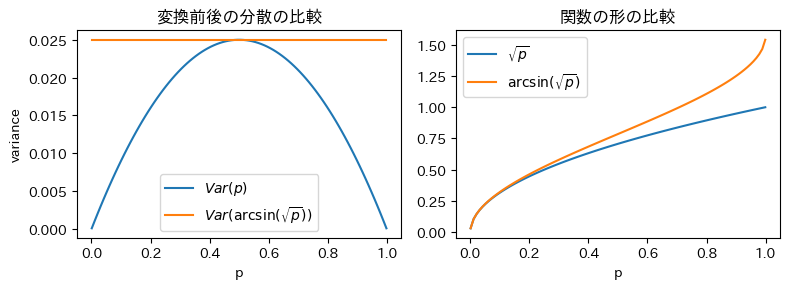

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

fig, axes = plt.subplots(figsize=[8, 3], ncols=2)

b = 0.001 # ゼロ除算を防ぐためpの最小値を0にするのは避けておく
p = np.linspace(0 + b, 1 - b, 100)

ax = axes[0]
n = 10 # 架空のサンプルサイズ
# 変換前のpの分散（標準誤差）
var_raw = p * (1 - p) / n
ax.plot(p, var_raw, label=r"$Var(p)$")

# アークサイン変換後の分散をデルタ法で近似的に計算
# y = arcsin(sqrt(p)) の微分 dy/dp = 1/(2*sqrt(p)*sqrt(1-p))
# Var(y) ≈ (dy/dp)^2 * Var(p)
dy_dp = 1 / (2 * np.sqrt(p) * np.sqrt(1 - p))
var_asin = (dy_dp**2) * var_raw
ax.plot(p, var_asin, label=r"$Var(\arcsin(\sqrt{p}))$")
ax.legend()
ax.set(xlabel="p", ylabel="variance", title="変換前後の分散の比較")

ax = axes[1]
ax.plot(p, np.sqrt(p), label=r"$\sqrt{p}$")
ax.plot(p, np.asin(np.sqrt(p)), label=r"$\arcsin(\sqrt{p})$")
ax.legend()
ax.set(xlabel="p", title="関数の形の比較")

plt.tight_layout()
